<a href="https://colab.research.google.com/github/sladem-tox/PK_calcs/blob/main/MultipleOralDose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Oral Dose plasma-time curve.
`Page by Dr Slade Matthews, The University of Sydney, 2023`

The plasma concentration at any time following multiple dosing can be determined with the following formula * :

\begin{equation} C_p = \frac{F.Dose.k_a}{Vd(k_e-k_a)} * \Big[ \Big( \frac{1-e^{-nk_a \tau}}{(1-e^{-k_a.\tau})} \Big)*e^{-k_at} - \Big(\frac{1-e^{-nk_e τ}}{(1-e^{-k_e.\tau})} \Big)*e^{-kt} \Big] \end{equation}

Where n = number of doses, τ = dose interval, F = fraction absorbed, t = time after administration of n doses.

*
*Appears as equation 8.34 in Applied Biopharmaceutics and Pharmacokinetics 6e.*

In the cell below we require values for dose, Cl, Vd, F, and ka.
This simple model does not account for salting effects, metabolism, etc.

Example from textbook.

Cp at 4 hours after the seventh dose may be calculated using Equation 8.34, letting n = 7, t = 4, τ = 8, and making the appropriate substitutions. Where Bioavailability = 0.75, Dose = 250, ka = 0.9h^-1, Vd =1.5, ke =0.07.


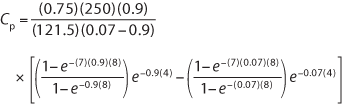

Cp = 2.86 mg/L

So the plasma concentration following each dose must be calculated separately and then added together using superposition of the curves to get the whole plasma-time curve for multiple dosing.

The variable t becomes time since the nth dose being modelled. So for the first dose time is simply t but for the 3rd dose, t = (time - (2*τ)).


In [30]:
############
# Parameters:
dose =250
tau = 8 # dosing interval is called tau
dosetime = 4 # 4 hours after the 7th dose
n = 7 # The 7th dose
F = 0.75
ka = 0.9
k = 0.07
kdif = -0.83
Vd = 121.5 #1.5 * 81 # Vd in L / kg so times 81 kg
Cl = k*Vd

So here we check that we can get the same value as the textbook with out python script...

In [31]:
# At 4 hours after the 7th dose
import numpy as np
Cp = ((F*dose*ka)/(Vd*kdif)) * ( (((1-np.exp(-n*ka*tau))/(1-np.exp(-ka*tau)))*np.exp(-ka*dosetime))-(((1-np.exp(-n*k*tau))/(1-np.exp(-k*tau)))*np.exp(-k*dosetime)) )
round(Cp,2)

2.85

OK. So now we try to map the whole of dose 7...

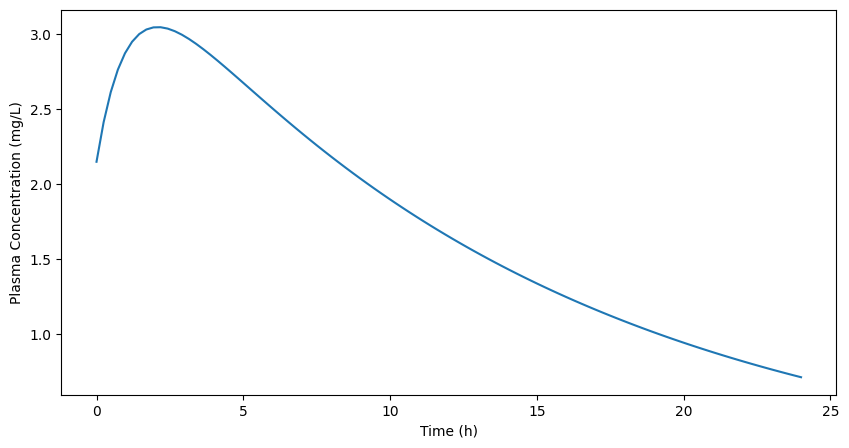

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters:
dose =250
tau = 8 # dosing interval is called tau
dosetime = 4 # 4 hours after the 7th dose
n = 7 # The 7th dose
F = 0.75
ka = 0.9
k = 0.07
kdif = -0.83
Vd = 121.5 #1.5 * 81 # Vd in L / kg so times 81 kg
Cl = k*Vd

time = np.linspace(0, 24, 100)

for t in time:
  n = int(time/tau)
  dosetime = (time - n*tau)


y = ((F*dose*ka)/(Vd*kdif)) * ( (((1-np.exp(-n*ka*tau))/(1-np.exp(-ka*tau)))*np.exp(-ka*dosetime))-(((1-np.exp(-n*k*tau))/(1-np.exp(-k*tau)))*np.exp(-k*dosetime)) )
 
fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.plot(dosetime, y)
plt.xlabel("Time (h)")
plt.ylabel("Plasma Concentration (mg/L)")
 
# Show the plot
plt.show()

# Finally we generate a plot of multiple dosing where we can choose the dose rate τ and how long we observe (using np.linspace, 168 hours in a week).

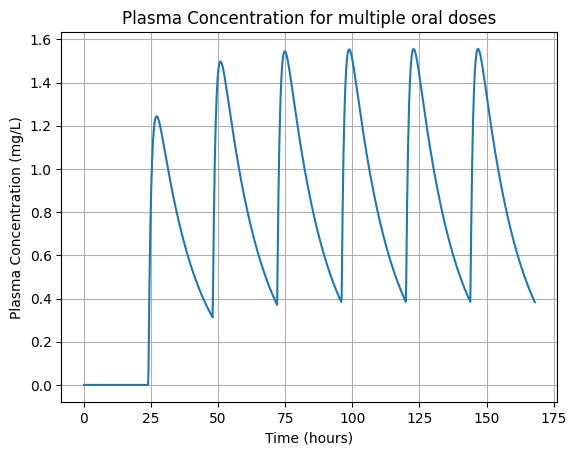

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dose = 250
tau = 24
#n = 7 # See below that the "n" value for dose count is now n_array worked out by comparing dose interval with time.
F = 0.75
ka = 0.9
k = 0.07
kdif = -0.83
Vd = 121.5
Cl = k * Vd

# Time range
time = np.linspace(0, 168, num=1000)

# Calculate plasma concentration
n_array = np.int_(time / tau)
dosetime = time - (n_array * tau)
y = ((F * dose * ka) / (Vd * kdif)) * (
    (((1 - np.exp(-n_array * ka * tau)) / (1 - np.exp(-ka * tau))) * np.exp(-ka * dosetime)) -
    (((1 - np.exp(-n_array * k * tau)) / (1 - np.exp(-k * tau))) * np.exp(-k * dosetime))
)

# Plotting
plt.plot(time, y)
plt.xlabel('Time (hours)')
plt.ylabel('Plasma Concentration (mg/L)')
plt.title('Plasma Concentration for multiple oral doses')
plt.grid(True)
plt.show()
